In [459]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load Tesla stock data
data = pd.read_csv(r"C:\Users\INDIA\Downloads\TSLA.csv")

# Convert 'Date' to datetime format and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# We'll work only with the 'Close' prices
close_prices = data[['Close']] 
ds=close_prices.values #convert to numpyarray
train_data_len= int(np.ceil(len(data) * 0.8))

In [460]:
print(data.head(),'\n')

print(data.info(),'\n')

print(data.isnull().sum(),'\n')

print(data.drop_duplicates(inplace=True),'\n')

data.index

                 Open   High        Low      Close  Adj Close    Volume
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2010-06-29 to 2020-02-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2416 non-null   float64
 1   High       2416 non-null   float64
 2   Low        2416 non-null   float64
 3   Close      2416 non-null   float64
 4   Adj Close  2416 non-null   float64
 5   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.1 K

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03'],
              dtype='datetime64[ns]', name='Date', length=2416, freq=None)

In [461]:
# Normalize the Close Prices
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close_prices)

train_data= scaled_close[:train_data_len]

In [462]:
#Create Time-Series Sequences
X_train, y_train = [], []
window_size = 60 # 60 days

for i in range(window_size, len(train_data)):
        X_train.append(train_data[i - window_size:i, 0])
        y_train.append(train_data[i, 0])

X_train , y_train = np.array(X_train), np.array(y_train)



# Reshape X to be [samples, time steps, features] for RNN/LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [463]:
#Callbacks,Modelcheckpoint for Saving Best Models
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint_rnn = ModelCheckpoint("best_rnn_model.h5", monitor='val_loss', save_best_only=True)
checkpoint_lstm = ModelCheckpoint("best_lstm_model.h5", monitor='val_loss', save_best_only=True)

In [464]:
#Build SimpleRNN Model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(window_size, 1)))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

rnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, callbacks=[early_stop, checkpoint_rnn])

Epoch 1/30


C:\Users\INDIA\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0087

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0086 - val_loss: 0.0014
Epoch 2/30
48/53 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0010

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0010 - val_loss: 4.0594e-04
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.4025e-04 - val_loss: 5.1631e-04
Epoch 4/30
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.3846e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.3289e-04 - val_loss: 2.3584e-04
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.7228e-04 - val_loss: 6.8562e-04
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.6385e-04 - val_loss: 2.4078e-04
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.0747e-04 - val_loss: 2.7274e-04
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.0478e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.0491e-04 - val_loss: 1.6668e-04
Epoch 9/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.6430e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.6411e-04 - val_loss: 1.6560e-04
Epoch 10/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.1773e-04 - val_loss: 5.8052e-04
Epoch 11/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.5213e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.5165e-04 - val_loss: 1.6099e-04
Epoch 12/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.0541e-04 - val_loss: 3.4574e-04
Epoch 13/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.2169e-04 - val_loss: 4.5133e-04
Epoch 14/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.3593e-04 - val_loss: 4.7407e-04
Epoch 15/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.8399e-04 - val_loss: 5.0886e-04
Epoch 16/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.5147e-04 - val_loss: 2.1309e-04
Epoch 17/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.8842e-04 - val_loss: 1.9718e-04
Epoch 18/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.5966e-04 - val_loss: 2.3681e-04
Epoch 19/30
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.8650e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.8477e-04 - val_loss: 1.5299e-04
Epoch 20/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.3990e-04 - val_loss: 3.9348e-04
Epoch 21/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.5857e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.5857e-04 - val_loss: 1.5080e-04
Epoch 22/30
49/53 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.6224e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.6227e-04 - val_loss: 1.4127e-04
Epoch 23/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.3550e-04 - val_loss: 1.5615e-04
Epoch 24/30
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.1898e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.2069e-04 - val_loss: 1.3762e-04
Epoch 25/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.0209e-04 - val_loss: 2.4687e-04
Epoch 26/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.4055e-04 - val_loss: 1.6523e-04
Epoch 27/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.3320e-04 - val_loss: 2.4541e-04
Epoch 28/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.1163e-04 - val_loss: 2.4867e-04
Epoch 29/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0165e-04 - val_loss: 1.6630e-04
Epoch 30/30
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.1279e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.1344e-04 - val_loss: 1.3448e-04


In [465]:
#Build LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(window_size, 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, callbacks=[early_stop, checkpoint_lstm])

Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0098

53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0097 - val_loss: 6.7001e-04
Epoch 2/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 5.8494e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 5.8229e-04 - val_loss: 4.4390e-04
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 4.8713e-04 - val_loss: 6.1173e-04
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 5.3638e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 5.3580e-04 - val_loss: 4.2842e-04
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 3.6300e-04 - val_loss: 4.5667e-04
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 4.0617e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 4.0538e-04 - val_loss: 4.0757e-04
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 3.3783e-04 - val_loss: 4.5405e-04
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 3.9257e-04 - val_loss: 6.7792e-04
Epoch 9/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.4155e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 3.4140e-04 - val_loss: 4.0147e-04
Epoch 10/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 3.2803e-04 - val_loss: 4.5997e-04
Epoch 11/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.0876e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 3.0872e-04 - val_loss: 3.7207e-04
Epoch 12/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.5924e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 3.5869e-04 - val_loss: 3.5251e-04
Epoch 13/30
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.4020e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 3.3990e-04 - val_loss: 3.4506e-04
Epoch 14/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.9136e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2.9138e-04 - val_loss: 3.4335e-04
Epoch 15/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 3.0741e-04 - val_loss: 5.4297e-04
Epoch 16/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 3.0509e-04 - val_loss: 4.3615e-04
Epoch 17/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.5477e-04 - val_loss: 5.0592e-04
Epoch 18/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.6445e-04 - val_loss: 4.1878e-04
Epoch 19/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 2.6236e-04 - val_loss: 5.4026e-04
Epoch 20/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.6710e-04 - val_loss: 4.4645e-04
Epoch 21/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.4485e-04 - val_loss: 4.5438e-04
Epoch 22/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.3042e-04 - val_loss: 5.8008e-04
Epoch 23/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.3302e-04 - val_loss: 3.5135e-04
Epoch 24/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 2.3815e-04 -

In [466]:
#Load the Best Models Saved
best_rnn = load_model("best_rnn_model.h5")
best_lstm = load_model("best_lstm_model.h5")

test_data = scaled_close[train_data_len - window_size:]
X_test, y_test= [], data[train_data_len:]

for i in range(window_size,len(test_data)):
    X_test.append(test_data[i-window_size:i,0])

X_test=np.array(X_test)
X_test= X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
#Predictions
rnn_pred = best_rnn.predict(X_test)
lstm_pred = best_lstm.predict(X_test)

rnn_pred_inv = scaler.inverse_transform(rnn_pred)
lstm_pred_inv = scaler.inverse_transform(lstm_pred)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [467]:
print(data.index)

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03'],
              dtype='datetime64[ns]', name='Date', length=2416, freq=None)


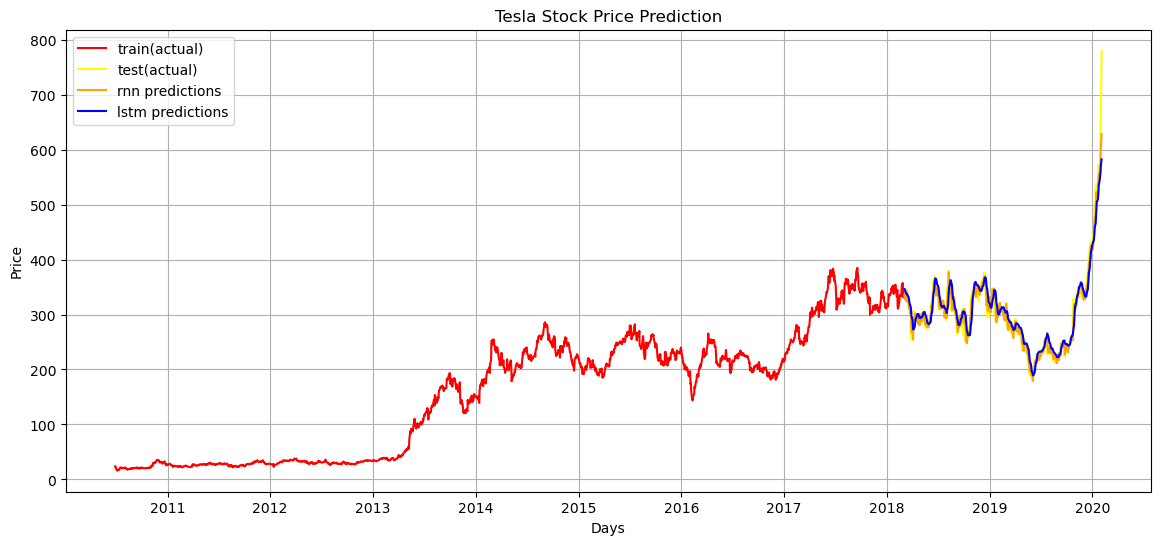

In [468]:
#plotting data
train= data[:train_data_len]
test= data[train_data_len:]

test=test.copy()

test['RNN Predictions'] = rnn_pred_inv
test['LSTM Predictions'] = lstm_pred_inv

plt.figure(figsize=(14, 6))
plt.plot(train.index,train['Close'], label = 'train(actual)' , color='red')
plt.plot(test.index,test['Close'], label = 'test(actual)' , color='yellow')
plt.plot(test.index,test['RNN Predictions'], label = 'rnn predictions' , color='orange')
plt.plot(test.index,test['LSTM Predictions'], label = 'lstm predictions' , color='blue')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [490]:
rnn_mse = mean_squared_error(test['Close'], rnn_pred_inv)
lstm_mse = mean_squared_error(test['Close'], lstm_pred_inv)

print("SimpleRNN MSE:", rnn_mse)
print("LSTM MSE:", lstm_mse)

SimpleRNN MSE: 228.34725864424766
LSTM MSE: 452.598764974328
